# Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


**They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:**
-  Which variables are significant in predicting the demand for shared bikes.
-  How well those variables describe the bike demands.

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Import libraries:

In [1]:
# Import important libraries and warnings:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing libraries for modelling:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

### Load the dataframe "day" as "df":

In [3]:
# Read dataframe as df:
df = pd.read_csv("day.csv")

### Steps:
- Performing EDA and Data Visualization.
- Data Preparation for Modelling.
- Data Modelling & Evaluation.

### Step 1: EDA & Visualization
- Reading and Understanding Data.
- Data cleaning: checking data types, dropping unecessary columns, etc.
- Visualizing correlation between different variables.

In [4]:
# Checking first five rows of df:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Reading and Understanding Data:

In [5]:
# Checking number of rows X columns:
df.shape

(730, 16)

In [6]:
pd.set_option("max_colwidth", 50) #to display max 130 the columns.
pd.set_option("display.max_rows", 1000) #to display max 1000 rows.

In [7]:
# Checking for data types and null values:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Checking statistical information of data:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Dropping redundant columns:
- **instant:** it is an index column which have no relation to target variable "cnt".
- **dteday:** there are already month and year column present so this column is of no use.
- **temp:** temp and atemp are same so we can drop one as it will lead to multicollinearity.
- **casual & registered:** cnt column is sum of these two columns.

In [9]:
# List of redundant variables:
red_list = df[["instant", "dteday", "atemp", "casual", "registered"]]

# Dropping redundant variables:
df.drop(red_list, axis = 1, inplace = True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


- **Categorical variables:** season, yr, mnth, holiday, weekday, workingday, weathersit
- **Continuous variables:** temp, hum, windspeed, cnt
- **Target Variable/Predictor Variable:** cnt

Here categorical variables values are in numeric form. So convert them into object type by mapping them into their corresponding categories.

***Before converting categorical variables let us take a look at correlations between each variables(using Heatmap).***

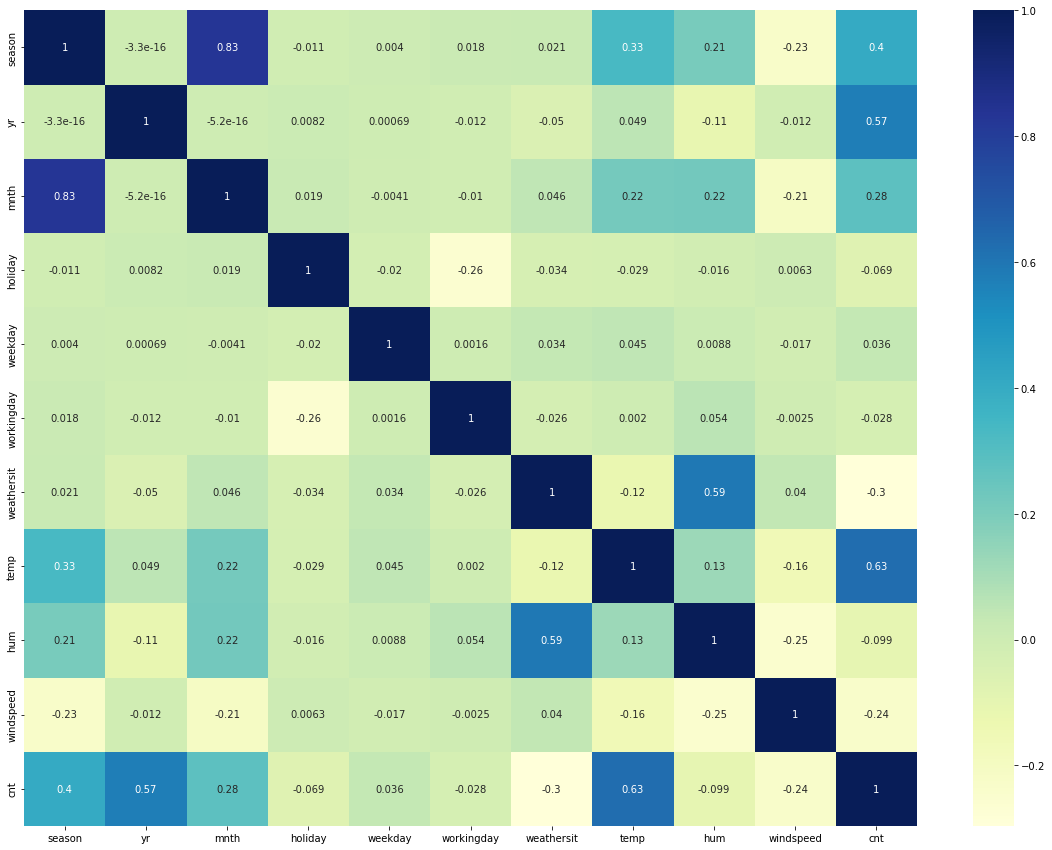

In [10]:
# Plotting Heatmap to show correlations betwen variables:
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

- **Month** & **Season** have highest correlation between them.
- **Humidity** & **weathersit** also have some correlation between them.
- **cnt** have maximum corrrelation with **temp** and followed by **yr**, **season** & **month**.
- **cnt** have inverse correlations with **holiday**, **workingday**, **weathersit**, **hum** & **windspeed**.

In [11]:
# Here categorical variables values are in numeric form. 
# So convert them into object type by mapping them into their corresponding categories.
# except for binary variables which has values 0 and 1.
# Checking for numeric categorical variables:
print("season:", df.season.unique())
print("yr:", df.yr.unique())
print("mnth:", df.mnth.unique())
print("holiday:", df.holiday.unique())
print("weekday:", df.weekday.unique())
print("workingday:", df.workingday.unique())
print("weathersit:", df.weathersit.unique())

season: [1 2 3 4]
yr: [0 1]
mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday: [0 1]
weekday: [1 2 3 4 5 6 0]
workingday: [1 0]
weathersit: [2 1 3]


Here **yr**, **holiday** & **workingday** are binary variables, so no need to convert them.

In [12]:
# Converting numeric categorical columns into object type:
df.season.replace({1: "spring", 2: "summer", 3: "fall", 4: "winter"}, inplace= True)
df.mnth.replace({1:"january", 2:"february", 3:"march", 4:"april", 5:"may", 6:"june", 7:"july", 8:"august", 9:"september", 10:"october", 11:"november", 12:"december"}, inplace= True)
df.weekday.replace({1:"monday", 2:"tuesday", 3:"wednesday", 4:"thursday", 5:"friday", 6:"saturday", 0:"sunday"}, inplace= True)
df.weathersit.replace({1: "clear", 2: "cloudy/mist", 3: "thunderstorm/rain", 4: "heavy rain/snow"}, inplace= True)

In [13]:
# Checking df again:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,january,0,monday,1,cloudy/mist,14.110847,80.5833,10.749882,985
1,spring,0,january,0,tuesday,1,cloudy/mist,14.902598,69.6087,16.652113,801
2,spring,0,january,0,wednesday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,january,0,thursday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,january,0,friday,1,clear,9.305237,43.6957,12.522300,1600


#### Visualizing Data:

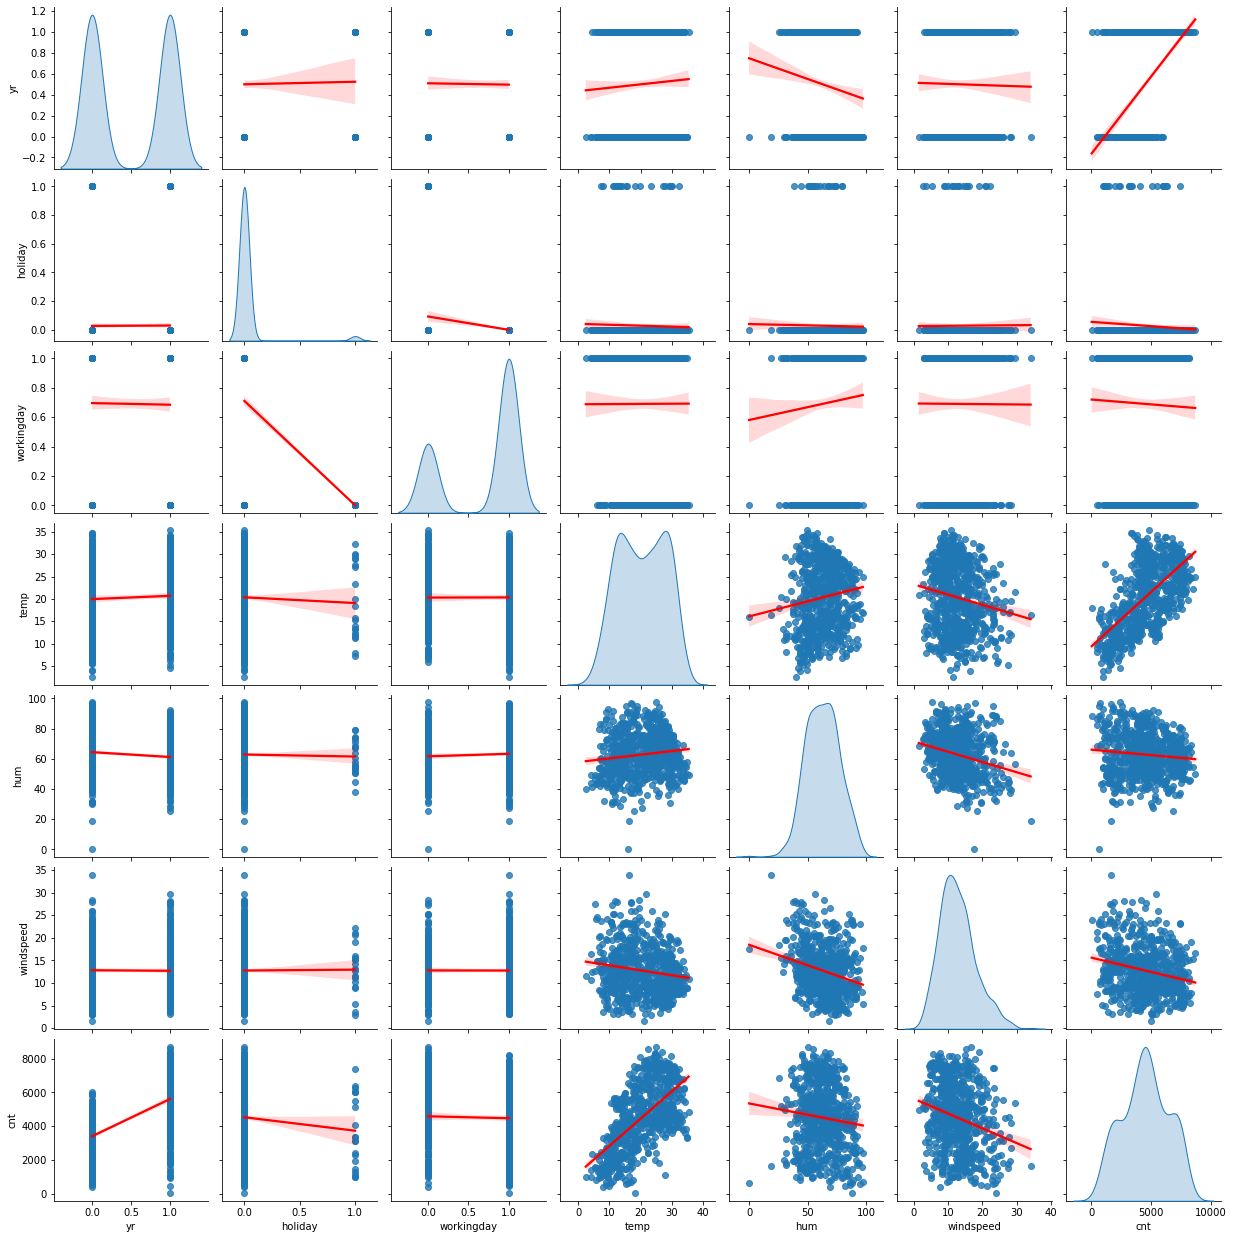

In [14]:
# Plotting numerical variables to check relation between various variables:
sns.pairplot(df, kind="reg", diag_kind = "kde", plot_kws={'line_kws':{'color':'red'}})
plt.show()

- **hum** & **temp** are correlated.
- **windspeed** & **temp** are negatively correlated.
- **windspeed** & **hum** are negatively correlated to **cnt**.

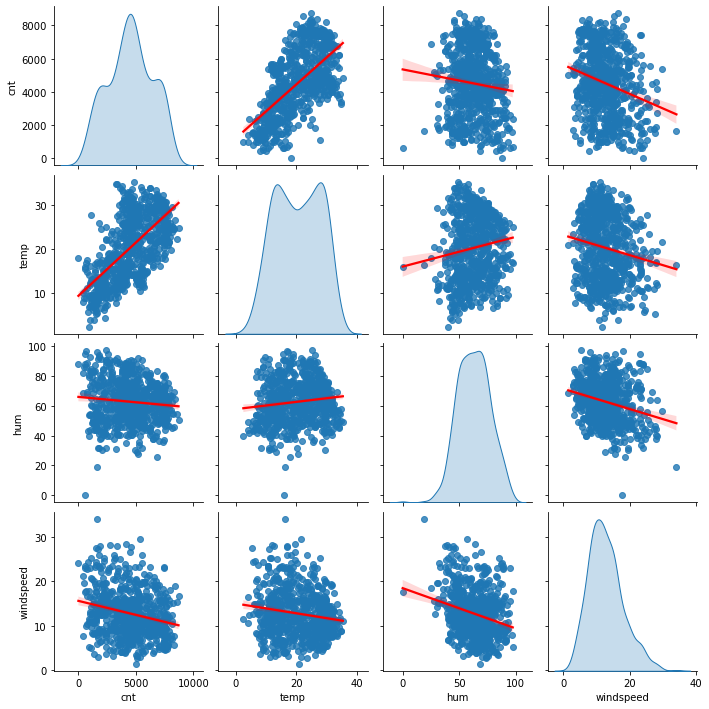

In [15]:
# Plotting continuous numerical variables to check relation between various variables:
num_var= df[["cnt", "temp", "hum", "windspeed"]]

sns.pairplot(num_var, kind="reg", diag_kind="kde", plot_kws={'line_kws':{'color':'red'}})
plt.show()

- **temp** and **cnt** has a linear relationship between them.

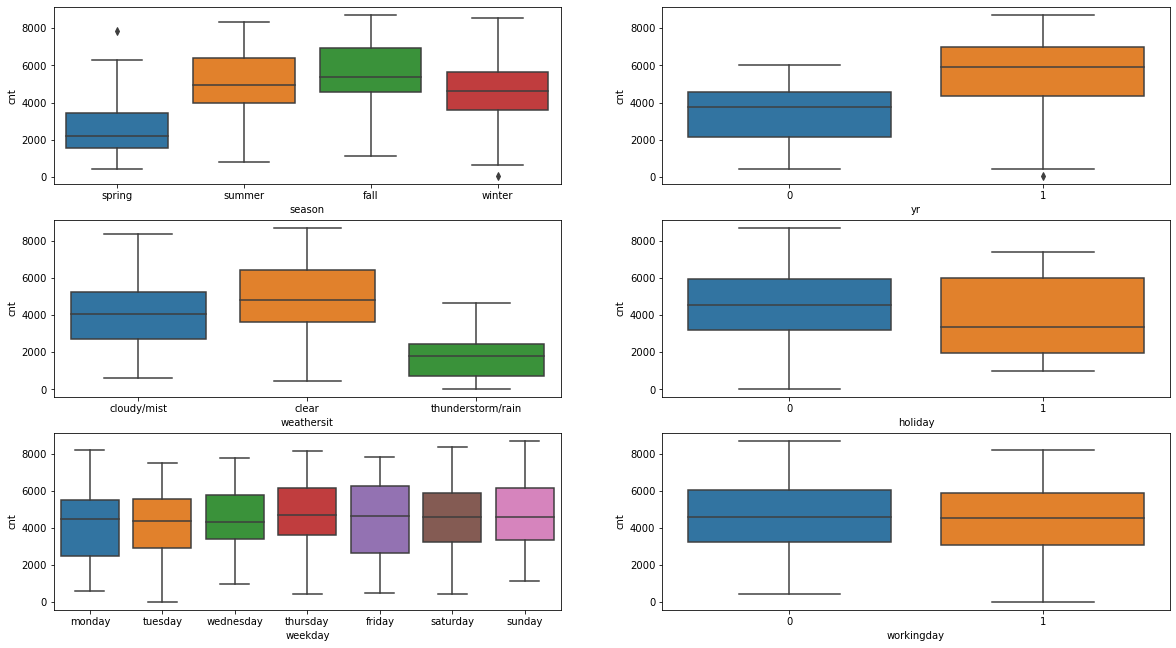

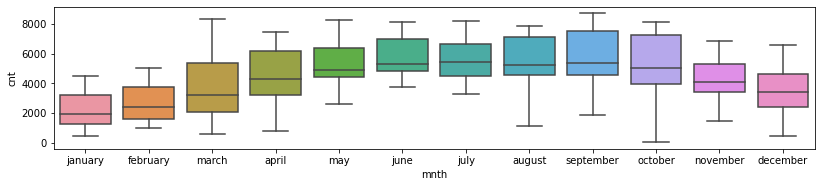

In [16]:
# Visualizing categorical variables as well with target variable:
plt.figure(figsize=(20, 15))

plt.subplot(4,2,1)
sns.boxplot(x = "season", y = "cnt", data = df)

plt.subplot(4,2,2)
sns.boxplot(x = "yr", y = "cnt", data = df)

plt.subplot(4,2,3)
sns.boxplot(x = "weathersit", y = "cnt", data = df)

plt.subplot(4,2,4)
sns.boxplot(x = "holiday", y = "cnt", data = df)

plt.subplot(4,2,5)
sns.boxplot(x = "weekday", y = "cnt", data = df)

plt.subplot(4,2,6)
sns.boxplot(x = "workingday", y = "cnt", data = df)

plt.figure(figsize = (30, 12))
plt.subplot(4,2,7)
sns.boxplot(x = "mnth", y = "cnt", data = df)


plt.show()

- Summer and Fall have most count of rental bikes.
- Thnderstorm/Rain have less count of rental bikes.
- 2019 have most count of rental bikes.
- Most people use rental bikes when there is no holiday.
- Workingday has no affect on count of rental bikes.
- March, September and October has maximum count for rental bikes.

### Step 2: Data Preparation
- Creating dummy variables for all categorical features.
- Dividing data into train & test sets.
- Perform scaling (Rescaling Features). 
- Dividing data into X & y.

#### Dummy Variables:

In [17]:
# Creating dummy variables for categorical variables:
season = pd.get_dummies(df[ "season"], drop_first = True)
month = pd.get_dummies(df[ "mnth"], drop_first = True)
weekday = pd.get_dummies(df[ "weekday"], drop_first = True)
weather = pd.get_dummies(df[ "weathersit"], drop_first = True)

In [18]:
# Merging dummy variables with original dataframe in a new dataframe:
df_1 = pd.concat([df, season, month, weekday, weather], axis = 1)
df_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,cloudy/mist,thunderstorm/rain
0,spring,0,january,0,monday,1,cloudy/mist,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,1,0
1,spring,0,january,0,tuesday,1,cloudy/mist,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,1,0
2,spring,0,january,0,wednesday,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,january,0,thursday,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,january,0,friday,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Dropping categorical variables as we already have dummy vraiables for them:
df_1.drop(["season", "mnth", "weekday", "weathersit"], axis = 1, inplace = True)
df_1.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,cloudy/mist,thunderstorm/rain
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Splitting data into train and test sets:

In [20]:
# Creating train set and test set for modelling:
np.random.seed(0)
df_train, df_test = train_test_split(df_1, train_size = 0.7, test_size = 0.3, random_state = 110)

#### Rescaling features of Continuous Variables:

In [21]:
# Defining minmaxscalar in scalar variable:
scaler = MinMaxScaler()

In [22]:
# Listing continuous variables:
con_vars = ["temp", "hum", "windspeed", "cnt"]

# Scaling continuous variables:
df_train[con_vars] = scaler.fit_transform(df_train[con_vars])

In [23]:
df_train.head() #first 5 rows of train set.

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,cloudy/mist,thunderstorm/rain
508,1,0,1,0.742483,0.736933,0.359052,0.776346,0,1,0,...,0,0,0,0,0,0,0,0,0,0
133,0,0,1,0.575304,0.948586,0.268526,0.389669,0,1,0,...,0,0,1,0,0,0,0,0,1,0
504,1,0,1,0.699909,0.545416,0.553414,0.817648,0,1,0,...,0,0,1,0,0,0,0,0,0,0
572,1,0,0,0.900316,0.611396,0.311568,0.791763,0,0,0,...,0,0,0,1,0,0,0,0,0,0
457,1,0,1,0.507811,0.407884,0.185464,0.776576,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
df_train.shape #no. of rows X columns in train set.

(510, 29)

In [25]:
df_train.describe() #basic statistical information of train set.

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,cloudy/mist,thunderstorm/rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.511765,0.033333,0.703922,0.546831,0.642529,0.392170,0.523960,0.239216,0.237255,0.256863,...,0.101961,0.078431,0.150980,0.137255,0.129412,0.152941,0.137255,0.150980,0.325490,0.031373
std,0.500352,0.179682,0.456974,0.232271,0.144115,0.178675,0.224423,0.427024,0.425818,0.437332,...,0.302894,0.269113,0.358381,0.344454,0.335985,0.360284,0.344454,0.358381,0.469018,0.174494
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344266,0.533526,0.264483,0.360245,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.557133,0.637747,0.366457,0.533652,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.748713,0.743359,0.492558,0.692648,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


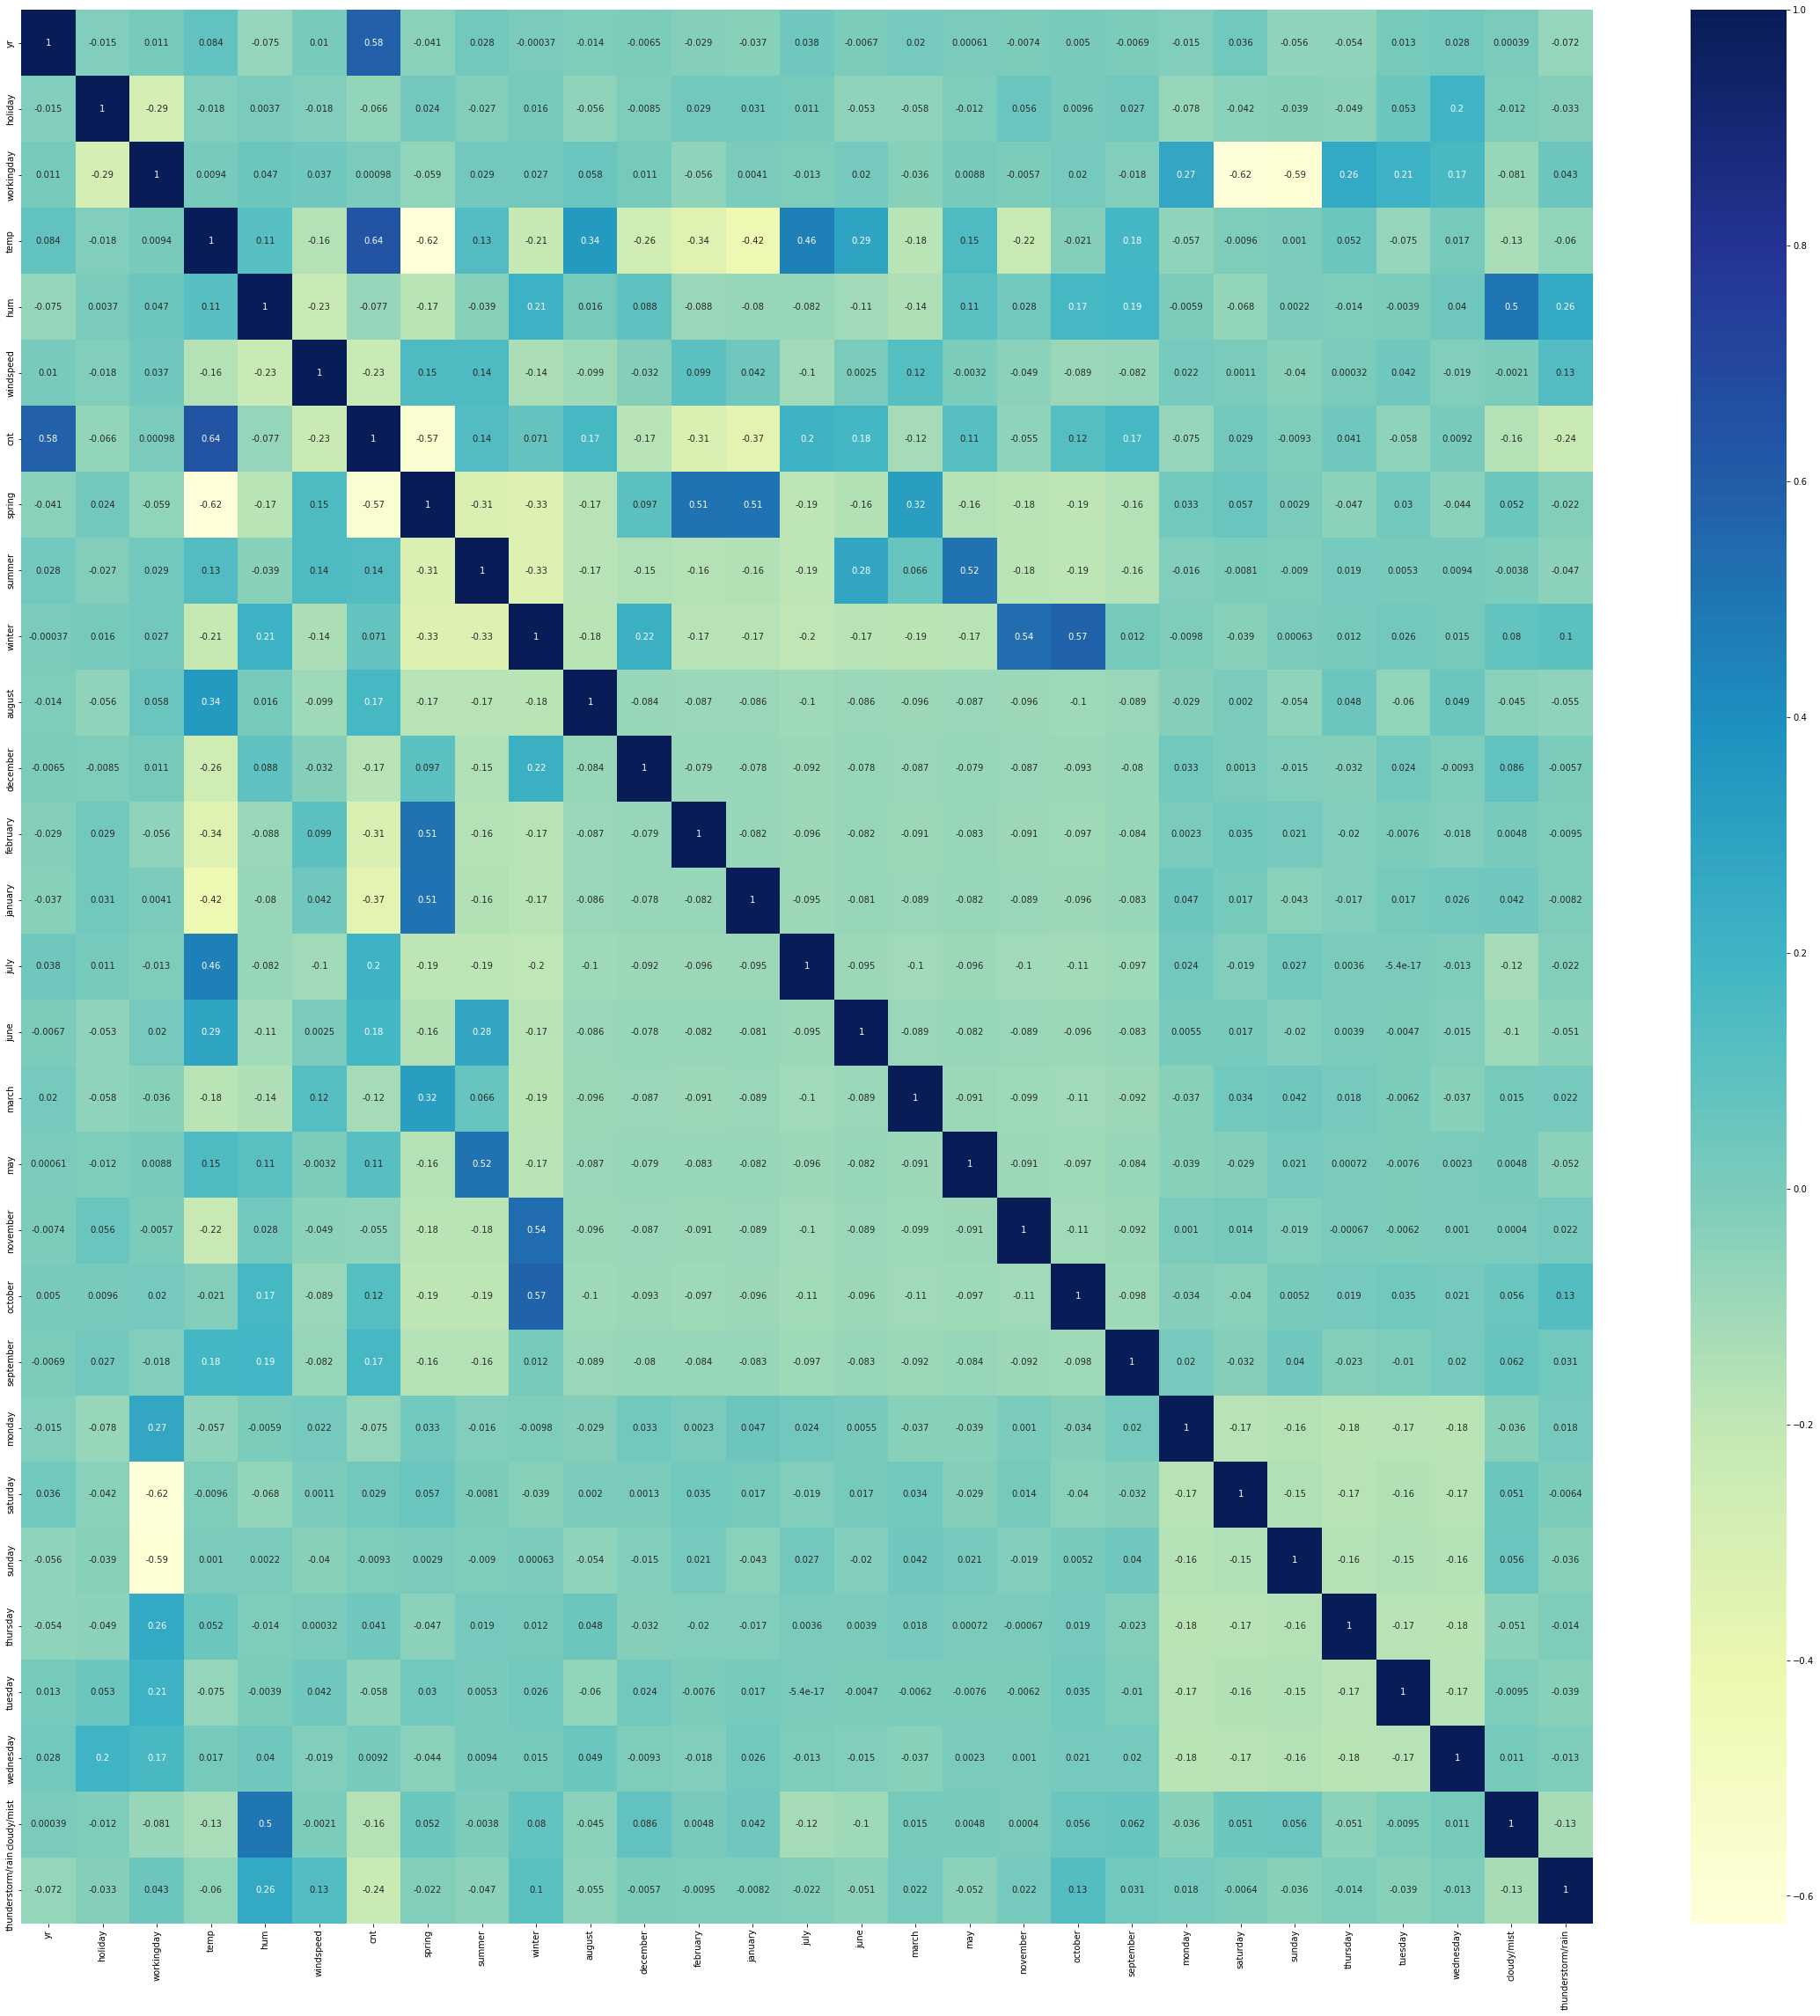

In [26]:
# Let's check the correlation coefficients to see which variables are highly correlated:

plt.figure(figsize = (40, 40))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- **cnt** have maximum correlations with **yr** & **temp**.
- **temp** has highest correlation with **july**.
- **workingday** has highest inverse correlations with **saturday** & **sunday**.

#### Dividing train set into X train and y train:

In [27]:
# Adding variables on x-axis and y-axis:
y_train = df_train.pop('cnt')
X_train = df_train

### Step 3: Data Modelling & Evaluation
- Building multiple linear regression model(MLR) using mixed approach i.e RFE & manual approach for Feature Elimination on train set.
- Checking various assumptions using residual analysis on train set.
- Buidling model on test set with same variables in train set. & making predictions on test set.
- Checking R-squared and Adjusted R-squared for both train & test data. 
- Final model.

#### Feature Elimination using RFE method and Manual Approach
In this, we will first remove some variables through RFE method.
Then we will remove variables manually to get best significant model for evaluation.

For removing variables manually, we need to check **p-value** & **VIF** of each variable.

In [28]:
# By using RFE(Recursive Feature Elimination) we will eliminate features and will be left with 13 variables:
lm = LinearRegression()
lm.fit(X_train, y_train)

# Using RFE and decreasing variables to 13:
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [29]:
# Check list of variables supported by RFE along with their ranking:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 9),
 ('winter', True, 1),
 ('august', False, 12),
 ('december', True, 1),
 ('february', False, 3),
 ('january', False, 2),
 ('july', True, 1),
 ('june', False, 11),
 ('march', False, 13),
 ('may', False, 5),
 ('november', True, 1),
 ('october', False, 10),
 ('september', True, 1),
 ('monday', False, 7),
 ('saturday', True, 1),
 ('sunday', True, 1),
 ('thursday', False, 14),
 ('tuesday', False, 6),
 ('wednesday', False, 8),
 ('cloudy/mist', False, 4),
 ('thunderstorm/rain', True, 1)]

In [30]:
# List of variables which are supported by RFE:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'december', 'july', 'november', 'september', 'saturday',
       'sunday', 'thunderstorm/rain'],
      dtype='object')

In [31]:
# List of variables which are not supported by RFE:
X_train.columns[~rfe.support_]

Index(['summer', 'august', 'february', 'january', 'june', 'march', 'may',
       'october', 'monday', 'thursday', 'tuesday', 'wednesday', 'cloudy/mist'],
      dtype='object')

#### Building a Linear Model:

- ***Model 1:***

In [32]:
# Building model using statsmodel for detailed statistics:
X_train_rfe = X_train[col]

In [33]:
# Adding constant:
X_train_sm1 = sm.add_constant(X_train_rfe)

# Fitting variables and building model:
lm_1 = sm.OLS(y_train, X_train_sm1).fit()

lm_1.params #fetch constant and coefficients value of variables.

print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     165.1
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          2.31e-181
Time:                        21:01:56   Log-Likelihood:                 496.38
No. Observations:                 510   AIC:                            -960.8
Df Residuals:                     494   BIC:                            -893.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4909      0.07

#### Checking Variance Inflation Factor(VIF):
It gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.

In [34]:
# Checking VIF of each variable:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,35.63
4,hum,25.23
3,temp,19.66
12,saturday,7.53
13,sunday,7.07
5,windspeed,6.49
6,spring,3.28
7,winter,2.88
1,holiday,2.32
0,yr,2.08


*Now, we will drop variables manually one by one so that we can get a significant model with **p-value < 0.05** & **VIF < 5**.* 

- ***Model 2:***

In [35]:
# Dropping a variable to check model efficiency:
X_train_m2 = X_train_rfe.drop("saturday", axis = 1)

In [36]:
# Adding constant:
X_train_sm2 = sm.add_constant(X_train_m2)

# Fitting variables and building model:
lm_2 = sm.OLS(y_train, X_train_sm2).fit()

print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     176.8
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          2.82e-182
Time:                        21:01:57   Log-Likelihood:                 495.85
No. Observations:                 510   AIC:                            -961.7
Df Residuals:                     495   BIC:                            -898.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4189      0.03

In [37]:
# Checking VIF of each variable:
vif = pd.DataFrame()
vif['Features'] = X_train_m2.columns
vif['VIF'] = [variance_inflation_factor(X_train_m2.values, i) for i in range(X_train_m2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,18.26
3,temp,14.18
2,workingday,5.68
5,windspeed,5.16
7,winter,2.75
6,spring,2.50
0,yr,2.07
12,sunday,1.83
10,november,1.74
9,july,1.54


- ***Model 3:***

In [38]:
# Dropping a variable to check model efficiency:
X_train_m3 = X_train_m2.drop("sunday", axis = 1)

In [39]:
# Adding constant:
X_train_sm3 = sm.add_constant(X_train_m3)

# Fitting variables and building model:
lm_3 = sm.OLS(y_train, X_train_sm3).fit()

print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.6
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          2.47e-183
Time:                        21:01:57   Log-Likelihood:                 495.63
No. Observations:                 510   AIC:                            -963.3
Df Residuals:                     496   BIC:                            -904.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4135      0.03

In [40]:
# Checking VIF of each variable:
vif = pd.DataFrame()
vif['Features'] = X_train_m3.columns
vif['VIF'] = [variance_inflation_factor(X_train_m3.values, i) for i in range(X_train_m3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,17.34
3,temp,14.01
5,windspeed,5.06
2,workingday,3.58
7,winter,2.73
6,spring,2.47
0,yr,2.07
10,november,1.74
9,july,1.54
8,december,1.32


- ***Model 4:***

In [41]:
# Dropping a variable to check model efficiency:
X_train_m4 = X_train_m3.drop("workingday", axis = 1)

In [42]:
# Adding constant:
X_train_sm4 = sm.add_constant(X_train_m4)

# Fitting variables and building model:
lm_4 = sm.OLS(y_train, X_train_sm4).fit()

print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.1
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          3.77e-184
Time:                        21:01:58   Log-Likelihood:                 494.80
No. Observations:                 510   AIC:                            -963.6
Df Residuals:                     497   BIC:                            -908.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4056      0.03

In [43]:
# Checking VIF of each variable:
vif = pd.DataFrame()
vif['Features'] = X_train_m4.columns
vif['VIF'] = [variance_inflation_factor(X_train_m4.values, i) for i in range(X_train_m4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,16.62
2,temp,13.87
4,windspeed,4.93
6,winter,2.72
5,spring,2.46
0,yr,2.06
9,november,1.74
8,july,1.54
7,december,1.32
10,september,1.21


- ***Model 5:***

In [44]:
# Dropping a variable to check model efficiency:
X_train_m5 = X_train_m4.drop("hum", axis = 1)

In [45]:
# Adding constant:
X_train_sm5 = sm.add_constant(X_train_m5)

# Fitting variables and building model:
lm_5 = sm.OLS(y_train, X_train_sm5).fit()

print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     192.3
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          2.59e-171
Time:                        21:01:58   Log-Likelihood:                 461.61
No. Observations:                 510   AIC:                            -899.2
Df Residuals:                     498   BIC:                            -848.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2399      0.02

In [46]:
# Checking VIF of each variable:
vif = pd.DataFrame()
vif['Features'] = X_train_m5.columns
vif['VIF'] = [variance_inflation_factor(X_train_m5.values, i) for i in range(X_train_m5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.15
3,windspeed,4.82
5,winter,2.29
0,yr,2.06
8,november,1.71
4,spring,1.68
7,july,1.47
6,december,1.27
9,september,1.20
10,thunderstorm/rain,1.08


- ***Model 6:***

In [47]:
# Dropping a variable to check model efficiency:
X_train_m6 = X_train_m5.drop("holiday", axis = 1)

In [48]:
# Adding constant:
X_train_sm6 = sm.add_constant(X_train_m6)

# Fitting variables and building model:
lm_6 = sm.OLS(y_train, X_train_sm6).fit()

print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     208.4
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          5.10e-171
Time:                        21:01:59   Log-Likelihood:                 458.14
No. Observations:                 510   AIC:                            -894.3
Df Residuals:                     499   BIC:                            -847.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2386      0.02

In [49]:
# Checking VIF of each variable:
vif = pd.DataFrame()
vif['Features'] = X_train_m6.columns
vif['VIF'] = [variance_inflation_factor(X_train_m6.values, i) for i in range(X_train_m6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.14
2,windspeed,4.82
4,winter,2.29
0,yr,2.06
7,november,1.71
3,spring,1.67
6,july,1.47
5,december,1.27
8,september,1.19
9,thunderstorm/rain,1.08


- ***Model 7:***

In [50]:
# Dropping a variable to check model efficiency:
X_train_m7 = X_train_m6.drop("september", axis = 1)

In [51]:
# Adding constant:
X_train_sm7 = sm.add_constant(X_train_m7)

# Fitting variables and building model:
lm_7 = sm.OLS(y_train, X_train_sm7).fit()

print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     230.2
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.56e-171
Time:                        21:01:59   Log-Likelihood:                 456.53
No. Observations:                 510   AIC:                            -893.1
Df Residuals:                     500   BIC:                            -850.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2394      0.02

In [52]:
# Checking VIF of each variable:
vif = pd.DataFrame()
vif['Features'] = X_train_m7.columns
vif['VIF'] = [variance_inflation_factor(X_train_m7.values, i) for i in range(X_train_m7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.80
1,temp,4.77
4,winter,2.28
0,yr,2.06
7,november,1.69
3,spring,1.67
6,july,1.41
5,december,1.27
8,thunderstorm/rain,1.08


- ***Model 8:***

In [53]:
# Dropping a variable to check model efficiency:
X_train_m8 = X_train_m7.drop("december", axis = 1)

In [54]:
# Adding constant:
X_train_sm8 = sm.add_constant(X_train_m8)

# Fitting variables and building model:
lm_8 = sm.OLS(y_train, X_train_sm8).fit()

print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     251.7
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          4.37e-170
Time:                        21:02:00   Log-Likelihood:                 450.26
No. Observations:                 510   AIC:                            -882.5
Df Residuals:                     501   BIC:                            -844.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2220      0.02

In [55]:
# Checking VIF of each variable:
vif = pd.DataFrame()
vif['Features'] = X_train_m8.columns
vif['VIF'] = [variance_inflation_factor(X_train_m8.values, i) for i in range(X_train_m8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.78
1,temp,4.73
0,yr,2.06
4,winter,1.94
3,spring,1.63
6,november,1.57
5,july,1.41
7,thunderstorm/rain,1.08


- ***Model 9:***

In [56]:
# Dropping a variable to check model efficiency:
X_train_m9 = X_train_m8.drop("november", axis = 1)

In [57]:
# Adding constant:
X_train_sm9 = sm.add_constant(X_train_m9)

# Fitting variables and building model:
lm_9 = sm.OLS(y_train, X_train_sm9).fit()

print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     284.0
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          4.56e-170
Time:                        21:02:01   Log-Likelihood:                 447.29
No. Observations:                 510   AIC:                            -878.6
Df Residuals:                     502   BIC:                            -844.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2109      0.02

In [58]:
# Checking VIF of each variable:
vif = pd.DataFrame()
vif['Features'] = X_train_m9.columns
vif['VIF'] = [variance_inflation_factor(X_train_m9.values, i) for i in range(X_train_m9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.73
1,temp,4.66
0,yr,2.06
3,spring,1.62
5,july,1.41
4,winter,1.38
6,thunderstorm/rain,1.07


- Model 7 seems to be pretty good, as its having **Very Low Multicollinearity** between predictor variables. P-values is also low and less than 0.05 which is pretty good and significant for model. We will consider **Model 7** as our final model(unless test data metrics are not significantly close to this number).

#### Residual Analysis on Train Set:

In [59]:
# Predicting cnt values on basis of selected model:
y_train_pred = lm_7.predict(X_train_sm7)

In [60]:
# Getting residual error/error terms values by differentiating actual y values with predicted y values:
res = y_train - y_train_pred

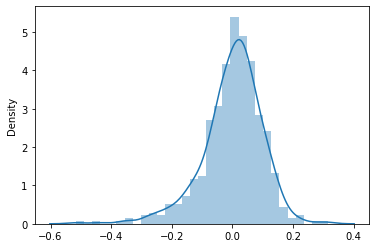

In [61]:
# Plotting distplot to check mean and distribution of residual error to check assumptions of linear regression:
sns.distplot(res)
plt.show()

- Mean = 0
- Normal Distribution

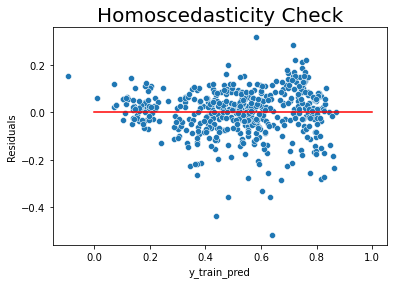

In [62]:
sns.scatterplot(y_train_pred, res)
plt.xlabel("y_train_pred")
plt.ylabel("Residuals")

sns.lineplot([0,1],[0,0], color = "red")
plt.title("Homoscedasticity Check", fontsize=20)

plt.show()

- Homoscedasticity means constant variance.
- Independent error terms
</br> **Hence, Linear Regression assumptions are also valid.**

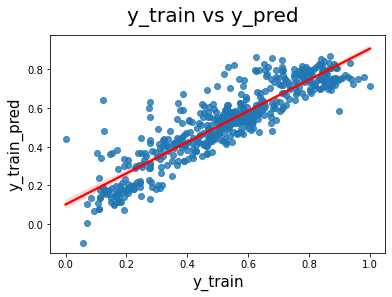

In [63]:
# Plotting y_test and y_pred to understand the spread:

fig = plt.figure()
sns.regplot(y_train, y_train_pred, line_kws={'color':'red'})
fig.suptitle('y_train vs y_pred', fontsize = 20)
plt.xlabel('y_train', fontsize = 15)
plt.ylabel('y_train_pred', fontsize = 15)

plt.show()

We can see our train model is reliable as it forms a linear relationship. Now lets check this model on test set.

### Making predictions using the Final Model:
After predicting values on train set, now lets make predictions using test set.

#### Scaling on test set continuous variables:

In [64]:
# Listing continuous variables:
cont_vars = ["temp", "hum", "windspeed", "cnt"]

# Scaling continuous variables:
df_test[con_vars] = scaler.transform(df_test[cont_vars])

In [65]:
# Checking rows X columns:
df_test.shape

(219, 29)

In [66]:
# Checking basic statistical information of test set:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,cloudy/mist,thunderstorm/rain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.474886,0.018265,0.657534,0.536706,0.652269,0.421899,0.497897,0.264840,0.283105,0.214612,...,0.045662,0.091324,0.127854,0.155251,0.173516,0.118721,0.159817,0.118721,0.365297,0.022831
std,0.500513,0.134214,0.475622,0.219096,0.152011,0.198224,0.218688,0.442259,0.451539,0.411493,...,0.209229,0.288730,0.334692,0.362974,0.379560,0.324202,0.367276,0.324202,0.482616,0.149707
min,0.000000,0.000000,0.000000,0.060271,0.193231,0.084581,0.047055,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.349977,0.548843,0.269290,0.363150,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.515079,0.664804,0.392461,0.491486,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.734695,0.759640,0.539767,0.644271,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.960541,0.997858,1.157215,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing test set into X test and y test:

In [67]:
# Adding variables on x-axis and y-axis:
y_test = df_test.pop('cnt')
X_test = df_test

In [68]:
# Creating X_test_m dataframe by dropping variables from X_test:
newcol = X_train_m7.columns
X_test = X_test[newcol]

In [69]:
# Adding constant variable to test set:
X_test_m = sm.add_constant(X_test)

In [70]:
# Making predictions using the test set model:
y_test_pred = lm_7.predict(X_test_m)

### Model Evaluation:

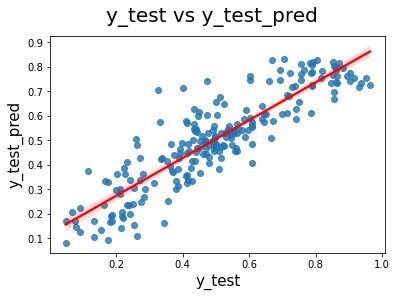

In [71]:
# Plotting y_test and y_pred to understand the spread:

fig = plt.figure()
sns.regplot(y_test, y_test_pred, line_kws={'color':'red'})
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 15)
plt.ylabel('y_test_pred', fontsize = 15)

plt.show()

We can see our test set model is also reliable as it forms a linear relationship.

### R-Squared value for test set:

In [72]:
r_square = r2_score(y_test, y_test_pred)
round(r_square, 3)

0.787

### Adjusted R-Squared value for test set:

In [73]:
n = X_test_m.shape[0]
p = X_test_m.shape[1]

In [74]:
adjusted_r2 = 1-(1-r_square)*(n-1) / (n-p-1)
round(adjusted_r2, 3)

0.776

### Final Result:
- R-Square of train set = 0.806
- Adjusted R-Square of train set = 0.802
- R-Square of test set = 0.787
- Adjusted R-Square of test set = 0.776

### F- Satatistics:
Higher F- Satatistic, higher the significance of model & lower Prob (F-statistic), higher the significance of model.
- F-statistic: 230.2
- Prob (F-statistic): 1.56e-171 (~0) 
</br>

**Hence, our model is significant and reliable.**

### Equation of Best Fit Line:

$cnt =  $ *0.2394 + (0.2358 X **yr**) + (0.4422 X **temp**) + (-0.1176 X **windspeed**) + (-0.1183 X **spring**) + (0.0762 X **winter**) + (-0.0672 X **december**) + (-0.0526 X **july**) + (-0.0661 X **november**) + (-0.2280 X **thunderstorm/rain**)*

## Final Report & Recommendations:

Top 9 features to predict count of rental bikes are:
- **temp** with coefficient 0.4422
- **yr**  with coefficient 0.2358
- **thunderstorm/rain** (weathersit_3) with coefficient -0.2280
- **spring** with coefficient -0.1183
- **windspeed** with coefficient -0.1176
- **winter** with coefficient 0.0762
- **december** with coefficient -0.0672
- **november** with coefficient -0.0661
- **july** with coefficient -0.0526

#### Demand depends mainly on these variables:
- *Positively linear related features with **cnt** are: temp, yr, winter. which means when one unit increases in these variables count will increase with feature coefficient values.*
- *Negatively linear related features with **cnt** are: windspeed, spring, december, july, november, thunderstorm/rain. which means when one unit increases in these variables count will decrease with feature coefficient values.*

#### Recommendations to the company:
- Bookings are less during thunderstorm/rain so company can use this time for bikes service as it would less imapct the buisness.
- Based on data, there will be increase in the bookings of rental bikes in upcoming year as they are used more in 2019 compared to 2018.
- Comapny should expand buisness andcome with new offers in winter as there is increase of count in winter season.